# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [1]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [2]:
import pandas as pd

data = pd.read_csv("Position_Salaries.csv")

print(data.head())

print(data.isnull().sum())

print(data.describe())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
Position    0
Level       0
Salary      0
dtype: int64
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


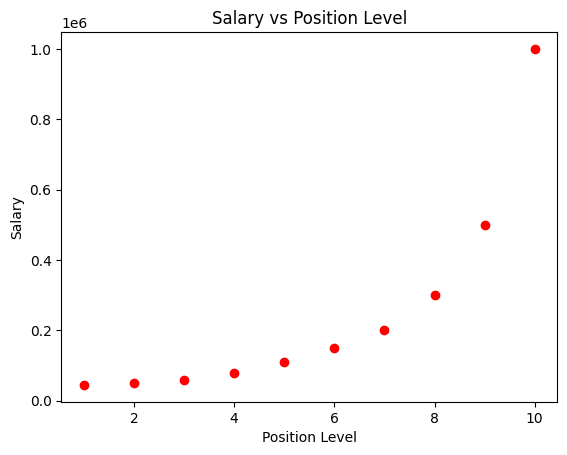

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data['Level'], data['Salary'], color='red')

plt.title('Salary vs Position Level')

plt.xlabel('Position Level')

plt.ylabel('Salary')

plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No



* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No



* Explain why you said yes or no to the above questions.
> * Because the data does not follow a linear trend. Using the simple linear regression will not able to capture relationship properly.
After plotting scatter plot the relationship between position lavel and salary level does not appear linear.

## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= \frac{1}{n} \sum_{i=1}^{n} (y_i - (\hat{w}_1 x_i^2 + \hat{w}_2 x_i + b))^2$$

**Gradient Descent Algorithm:**

Repeat until convergence:\
Gradient descent involves iteratively updating the parameters using the derivatives of the cost function until convergence.
\[
\begin{align*}
w_1 &:= w_1 - \alpha \frac{\partial MSE}{\partial w_1} \\
w_2 &:= w_2 - \alpha \frac{\partial MSE}{\partial w_2} \\
b &:= b - \alpha \frac{\partial MSE}{\partial b}
\end{align*}
\]

where $\alpha$ is the learning rate."

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes


* Explain why you said yes or no to the above questions.
> * Mean squarred error measures the average of the squares of the errors or deviations.It penalizes larger error more heavly, making it appropriate for measuring accuracy of model's predictions.

**Derivatives of cost function:**

\
\begin{align*}
\frac{\partial MSE}{\partial w_1} &= -\frac{2}{n} \sum_{i=1}^{n} x_i^2 \left( y_i - (\hat{w}_1 x_i^2 + \hat{w}_2 x_i + \hat{b}) \right) \\
\frac{\partial MSE}{\partial w_2} &= -\frac{2}{n} \sum_{i=1}^{n} x_i \left( y_i - (\hat{w}_1 x_i^2 + \hat{w}_2 x_i + \hat{b}) \right) \\
\frac{\partial MSE}{\partial b} &= -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - (\hat{w}_1 x_i^2 + \hat{w}_2 x_i + \hat{b}) \right)
\end{align*}
\
**Gradient Descent Algorithm:**
```
Repeat until converges:
```

**Gradient Descent Algorithm:**

Repeat until convergence:\
Gradient descent involves iteratively updating the parameters using the derivatives of the cost function until convergence.
\[
\begin{align*}
w_1 &:= w_1 - \alpha \frac{\partial MSE}{\partial w_1} \\
w_2 &:= w_2 - \alpha \frac{\partial MSE}{\partial w_2} \\
b &:= b - \alpha \frac{\partial MSE}{\partial b}
\end{align*}
\]

where $\alpha$ is the learning rate."

## Implementation of the model

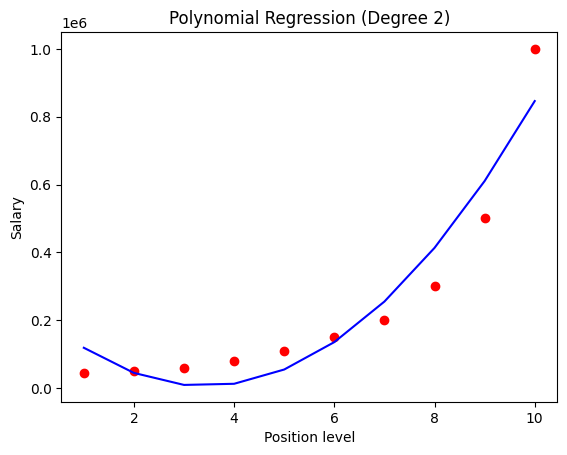

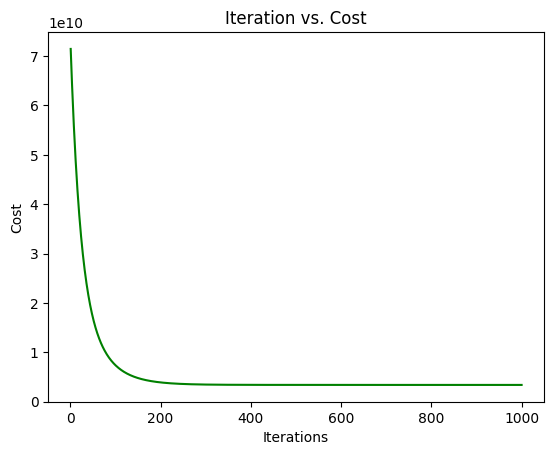

Predicted Salary for Position Level 7.5: $329063.31


In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

data = pd.read_csv("Position_Salaries.csv")

def feature_scaling(X):

    mean = np.mean(X, axis=0)

    std_dev = np.std(X, axis=0)

    X_scaled = (X - mean) / std_dev

    return X_scaled, mean, std_dev

def add_polynomial_features(X, degree):

    X_poly = np.ones((len(X), 1))

    for i in range(1, degree + 1):

        X_poly = np.append(X_poly, X ** i, axis=1)

    return X_poly

def polynomial_regression(X, y, degree, learning_rate, iterations):

    m = len(y)

    X_poly = add_polynomial_features(X, degree)

    n = X_poly.shape[1]

    theta = np.zeros(n)

    cost_history = []

    for _ in range(iterations):

        predictions = np.dot(X_poly, theta)

        error = predictions - y

        cost = np.sum(error ** 2) / (2 * m)

        cost_history.append(cost)

        gradients = np.dot(X_poly.T, error) / m

        theta -= learning_rate * gradients

    return theta, cost_history

def mean_squared_error(X, y, theta):

    m = len(y)

    predictions = np.dot(X, theta)

    error = predictions - y

    cost = np.sum(error ** 2) / (2 * m)

    return cost

X = data.iloc[:, 1:2].values

y = data.iloc[:, 2].values

X_scaled, mean_X, std_dev_X = feature_scaling(X)


degree = 2

learning_rate = 0.01

iterations = 1000

theta, cost_history = polynomial_regression(X_scaled, y, degree, learning_rate, iterations)

plt.scatter(X, y, color='red')

plt.plot(X, np.dot(add_polynomial_features(X_scaled, degree), theta), color='blue')

plt.title('Polynomial Regression (Degree 2)')

plt.xlabel('Position level')

plt.ylabel('Salary')

plt.show()

plt.plot(range(1, iterations + 1), cost_history, color='green')

plt.title('Iteration vs. Cost')

plt.xlabel('Iterations')

plt.ylabel('Cost')

plt.show()


new_position_level = 7.5

scaled_new_position_level = np.array([[new_position_level]])

scaled_new_position_level = (scaled_new_position_level - mean_X) / std_dev_X

X_new_poly = add_polynomial_features(scaled_new_position_level, degree)

predicted_salary = np.dot(X_new_poly, theta)

predicted_salary_value = predicted_salary.item()

print("Predicted Salary for Position Level {}: ${:.2f}".format(new_position_level, predicted_salary_value))


* What is learning rate?
> * It is the size of step taken during gradient descent to update the parameters.It helps in convergence and stablity of algorithm.

* What will happen if the learning rate is too large?
> * The algorithm may overshoot the minimum of cost function and fail to converge.This will produse divergence and instablity.

* What will happen if the learning rate is too small?
> * The algorithm may take small steps towards minimum of cost function and fail to converge.This will produce divergence and instablity.

* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * \
\begin{align*}
  \
w_1x_1^3 + w_2x_1^2 + w_3x_1 + b
\
\end{align*}



> * The cost function will remain same because it doesnot change with degree.
> * The derivative of cost function w.r.t.
$w_1, w_2, w_3$ and b need to be computed and used in gradient decent algorithm.

> * initialize $w_1, w_2, w_3$ and b appropriately.
> * we can adjust the plotting function to accomodate third-order model.